In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import matplotlib.pyplot as plt
from tensorflow import keras


In [2]:
data_dir="/home/dhananjai/Downloads/MSEE_297B/prepare_dataset/tensorflow_based/"

In [3]:
batch_size = 32
img_height = 28
img_width = 28

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir, 
  validation_split=0.2,
  subset="training",
  seed=123,  
  image_size=(img_height, img_width),
  batch_size=batch_size)
train_ds

Found 197 files belonging to 3 classes.
Using 158 files for training.


<BatchDataset shapes: ((None, 28, 28, 3), (None,)), types: (tf.float32, tf.int32)>

In [4]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir, 
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
test_ds    

Found 197 files belonging to 3 classes.
Using 39 files for validation.


<BatchDataset shapes: ((None, 28, 28, 3), (None,)), types: (tf.float32, tf.int32)>

In [5]:
class_names = train_ds.class_names
print(class_names)


['class_bird', 'class_cactus', 'class_dino']


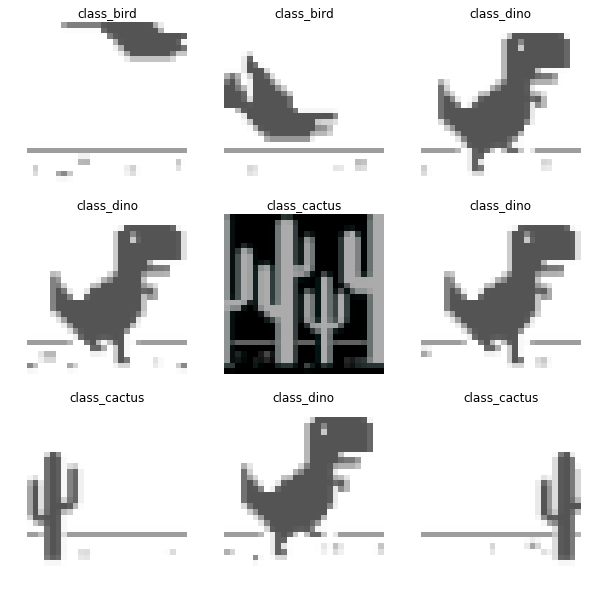

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [35]:
num_classes = 3

model_1 = tf.keras.Sequential([
  keras.layers.experimental.preprocessing.Rescaling(1./255),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(80, activation='relu'),
  keras.layers.Dense(num_classes)
])

In [36]:
model_1.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [46]:
model_1.fit(
  train_ds,
  epochs=30
)
history=model_1.fit(train_ds, epochs=30) 

Epoch 1/30
5/5 [==============================] - 0s 22ms/step - loss: 0.0431 - accuracy: 0.9873
Epoch 2/30
5/5 [==============================] - 0s 19ms/step - loss: 0.0379 - accuracy: 0.9873
Epoch 3/30
5/5 [==============================] - 0s 19ms/step - loss: 0.0436 - accuracy: 0.9810
Epoch 4/30
5/5 [==============================] - 0s 21ms/step - loss: 0.0544 - accuracy: 0.9747
Epoch 5/30
5/5 [==============================] - 0s 22ms/step - loss: 0.0454 - accuracy: 0.9873
Epoch 6/30
5/5 [==============================] - 0s 21ms/step - loss: 0.0516 - accuracy: 0.9873
Epoch 7/30
5/5 [==============================] - 0s 21ms/step - loss: 0.0437 - accuracy: 0.9873
Epoch 8/30
5/5 [==============================] - 0s 22ms/step - loss: 0.0405 - accuracy: 0.9873
Epoch 9/30
5/5 [==============================] - 0s 23ms/step - loss: 0.0375 - accuracy: 0.9873
Epoch 10/30
5/5 [==============================] - 0s 27ms/step - loss: 0.0382 - accuracy: 0.9873
Epoch 11/30
5/5 [============

In [47]:
test_loss, test_acc = model_1.evaluate(test_ds, verbose=2)

print('\nTest Accuracy:', test_acc*100)
print('\nTest Loss:', test_loss*100)

2/2 - 0s - loss: 0.0115 - accuracy: 1.0000

Test Accuracy: 100.0

Test Loss: 1.1483539827167988


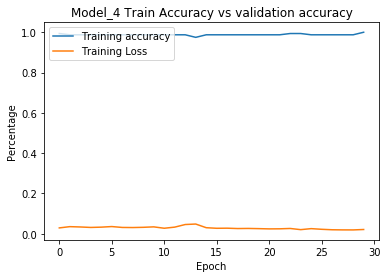

In [48]:
# Plot training accuracy vs loss values
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss']) #this is test
plt.title('Model_4 Train Accuracy vs validation accuracy')
plt.ylabel('Percentage')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Training Loss'], loc='upper left')
plt.show()

In [40]:
train_loss, train_acc = model_1.evaluate(train_ds, verbose=2)

print('\nTest Accuracy:', train_acc*100)
print('\nTest Loss:', train_loss*100)

5/5 - 0s - loss: 0.0384 - accuracy: 0.9873

Test Accuracy: 98.73417615890503

Test Loss: 3.837672248482704


In [41]:
model_4 = keras.Sequential(
[
    keras.layers.Flatten(input_shape=(28, 28,3)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  
])

model_4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model_4.fit(train_ds, epochs=30) 


Epoch 1/30
5/5 [==============================] - 0s 7ms/step - loss: 218.3125 - accuracy: 0.4304
Epoch 2/30
5/5 [==============================] - 0s 5ms/step - loss: 62.1924 - accuracy: 0.6456
Epoch 3/30
5/5 [==============================] - 0s 5ms/step - loss: 45.7326 - accuracy: 0.7532
Epoch 4/30
5/5 [==============================] - 0s 6ms/step - loss: 30.6398 - accuracy: 0.7215
Epoch 5/30
5/5 [==============================] - 0s 5ms/step - loss: 17.4622 - accuracy: 0.7025
Epoch 6/30
5/5 [==============================] - 0s 6ms/step - loss: 34.1156 - accuracy: 0.8544
Epoch 7/30
5/5 [==============================] - 0s 5ms/step - loss: 22.7014 - accuracy: 0.7595
Epoch 8/30
5/5 [==============================] - 0s 5ms/step - loss: 9.0808 - accuracy: 0.8481
Epoch 9/30
5/5 [==============================] - 0s 6ms/step - loss: 14.7209 - accuracy: 0.8101
Epoch 10/30
5/5 [==============================] - 0s 6ms/step - loss: 9.2006 - accuracy: 0.8101
Epoch 11/30
5/5 [=============

In [42]:
test_loss, test_acc = model_4.evaluate(test_ds, verbose=2)

print('\nTest Accuracy:', test_acc*100)
print('\nTest Loss:', test_loss*100)


2/2 - 0s - loss: 1.1097 - accuracy: 0.9744

Test Accuracy: 97.43589758872986

Test Loss: 110.9691858291626


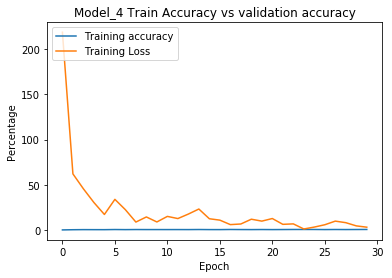

In [45]:

# Plot training accuracy vs loss values
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss']) #this is test
plt.title('Model_4 Train Accuracy vs validation accuracy')
plt.ylabel('Percentage')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Training Loss'], loc='upper left')
plt.show()


In [44]:
train_loss, train_acc = model_1.evaluate(train_ds, verbose=2)

print('\nTest Accuracy:', train_acc*100)
print('\nTest Loss:', train_loss*100)

5/5 - 0s - loss: 0.0384 - accuracy: 0.9873

Test Accuracy: 98.73417615890503

Test Loss: 3.837672248482704


In [28]:
import numpy as np 
import matplotlib.pyplot as plt 
import pylab
import pandas as pd

#fashion_data = pd.read_csv("fashion-mnist_test.csv")
fashion_data = pd.read_csv("dino_image_data.csv")


In [43]:
fashion_data


,2.550000000000000000e+02,2.550000000000000000e+02.1,2.550000000000000000e+02.2,2.550000000000000000e+02.3,2.550000000000000000e+02.4,2.550000000000000000e+02.5,2.550000000000000000e+02.6,2.550000000000000000e+02.7,2.550000000000000000e+02.8,2.550000000000000000e+02.9,...,2.550000000000000000e+02.1500,2.550000000000000000e+02.1501,2.550000000000000000e+02.1502,2.550000000000000000e+02.1503,2.550000000000000000e+02.1504,2.550000000000000000e+02.1505,2.550000000000000000e+02.1506,2.550000000000000000e+02.1507,2.550000000000000000e+02.1508,2.550000000000000000e+02.1509
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [14]:
fashion_data.head()



,2.550000000000000000e+02,2.550000000000000000e+02.1,2.550000000000000000e+02.2,2.550000000000000000e+02.3,2.550000000000000000e+02.4,2.550000000000000000e+02.5,2.550000000000000000e+02.6,2.550000000000000000e+02.7,2.550000000000000000e+02.8,2.550000000000000000e+02.9,...,2.550000000000000000e+02.1500,2.550000000000000000e+02.1501,2.550000000000000000e+02.1502,2.550000000000000000e+02.1503,2.550000000000000000e+02.1504,2.550000000000000000e+02.1505,2.550000000000000000e+02.1506,2.550000000000000000e+02.1507,2.550000000000000000e+02.1508,2.550000000000000000e+02.1509
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [28]:
#.iloc[0:10,0:10
#fashion_data.reset_index(drop=True, inplace=True)
fashion_data.iloc[0:1,:].values

array([[255., 255., 255., ..., 255., 255., 255.]])

In [44]:
fashion_data.describe()



,2.550000000000000000e+02,2.550000000000000000e+02.1,2.550000000000000000e+02.2,2.550000000000000000e+02.3,2.550000000000000000e+02.4,2.550000000000000000e+02.5,2.550000000000000000e+02.6,2.550000000000000000e+02.7,2.550000000000000000e+02.8,2.550000000000000000e+02.9,...,2.550000000000000000e+02.1500,2.550000000000000000e+02.1501,2.550000000000000000e+02.1502,2.550000000000000000e+02.1503,2.550000000000000000e+02.1504,2.550000000000000000e+02.1505,2.550000000000000000e+02.1506,2.550000000000000000e+02.1507,2.550000000000000000e+02.1508,2.550000000000000000e+02.1509
count,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
mean,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
25%,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
50%,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
75%,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
max,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [27]:

fashion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Columns: 2025 entries, 2.550000000000000000e+02 to 2.550000000000000000e+02.1509
dtypes: float64(2025)
memory usage: 63.4 KB


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
#from keras.utils import plot_model
#from tensorflow.keras.utils import plot_model

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
#from keras import losses

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import time

print(tf.__version__)


2.3.0


# Loading data, Splitting it into test & train

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
train_images.shape



(60000, 28, 28)

In [8]:
train_images.size

47040000

In [9]:
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

# Generating color bar based image

In [3]:
dino_data = pd.read_csv("dino_image_data.csv")
dino_data.shape

(134, 89)

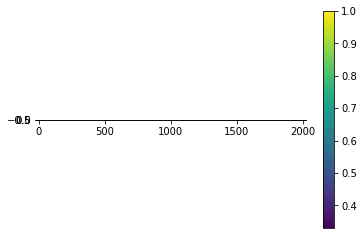

In [34]:
fashion_data = pd.read_csv("dino_image_data.csv")
fashion_data=fashion_data/255
#plt.imshow(train_images[0])
plt.imshow(fashion_data.iloc[0:1,:].values)
plt.colorbar()
plt.grid(False)
plt.show()

# Normalizing data & Regenerating images from data set

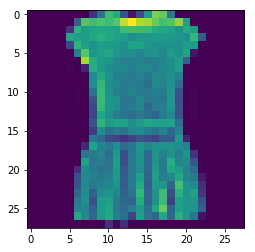

In [12]:

#int to float
#train_images = train_images / 255.0

#test_images = test_images / 255.0

#train_images=fashion_data.iloc[0:1,:].values
#plt.figure(figsize=(10,10))
plt.imshow(train_images[1])
plt.imshow(train_images[3])
#plt.imshow(train_images)
plt.show()


# Creating and simulating MODEL-0

# Creating and simulating MODEL-1

weights_l1 [array([[-0.07683672, -0.07513089],
       [-0.05199541,  0.06436145],
       [ 0.0336867 , -0.02749248],
       ...,
       [ 0.07467551,  0.01428636],
       [ 0.0448877 , -0.01824667],
       [-0.01826128, -0.00361484]], dtype=float32), array([0., 0.], dtype=float32)]
weights_l2 [array([[ 0.42319041,  0.69910794, -0.11388719, -0.36439508,  0.53351825,
        -0.26728487,  0.22007567,  0.41734022, -0.09621012,  0.07352263],
       [-0.09928703,  0.505408  , -0.07427859,  0.5135868 ,  0.70342547,
        -0.22952297,  0.22850299, -0.5795625 , -0.5204485 ,  0.03670704]],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 129us/sample - loss: 1.9457 - accuracy: 0.2275 - val_loss: 1.7881 - val_accuracy: 0.2773
Epoch 2/5
54000/54000 [==============================] - 5s 95us/sample - loss: 1.6458 - accuracy: 0.3065 - val_loss: 1.5521 -

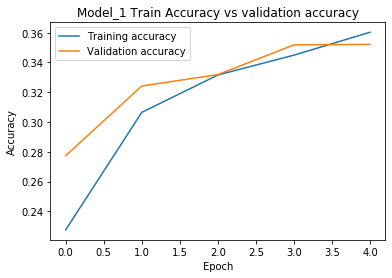

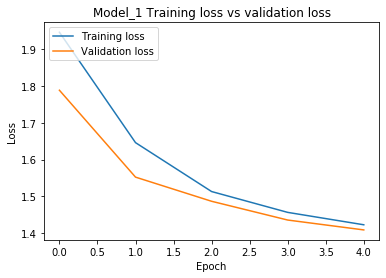


-------Evaluating Final Test Performance-------

10000/1 - 1s - loss: 1.3604 - accuracy: 0.3560

Test Accuracy: 35.600000619888306

Test Loss: 141.99922004699707


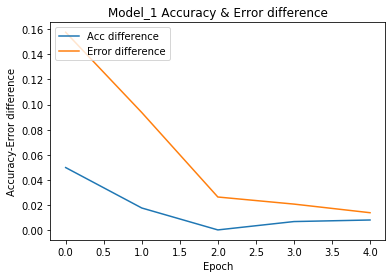


 Model-1 Confusion Matrix
 [[156   1  33 634  70   0  87  11   8   0]
 [  9 923   3  55   2   0   5   1   2   0]
 [119   0 151  61 180   3 453   4  29   0]
 [ 85 134  19 650  34   0  65   3  10   0]
 [141   2 117 134 153   1 420  10  22   0]
 [  0   0   3   0   0  10   0 937  50   0]
 [ 95   2 212 186 109   3 336   8  49   0]
 [  0   0   0   0   0   2   0 995   3   0]
 [  3   0  53   6   9  16  18 709 186   0]
 [  0   0   0   0   0   0   1 995   4   0]] 


 Model-1 Recall_score
 [0.156 0.923 0.151 0.65  0.153 0.01  0.336 0.995 0.186 0.   ]

 Model-1 Accuracy_score
 0.356

 Model-1 F1_score
 [0.19402985 0.89524733 0.18981772 0.47688921 0.19653179 0.01932367
 0.28176101 0.42585063 0.27292737 0.        ]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [7]:
start = time.time()
l1=keras.layers.Dense(2, activation='relu')
l2=keras.layers.Dense(10, activation='softmax') 
model_1 = keras.Sequential(
[
    keras.layers.Flatten(input_shape=(28, 28)),
    l1,
    l2     
])

#print(model_1.summary())
#plot_model(model_2, to_file='model.png')

print("weights_l1",l1.get_weights())
print("weights_l2",l2.get_weights())


model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model_1.fit(train_images, train_labels,validation_split = 0.1, epochs=5) #batch_size=4

end = time.time()
print("\n---Time to train Model_1---",time.strftime("%M:%S", time.gmtime(end-start))) 

print("history key",history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) #this is test
plt.title('Model_1 Train Accuracy vs validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) #plotted for test
plt.title('Model_1 Training loss vs validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper left')
plt.show()

model_1_t_acc=history.history['accuracy']
model_1_v_acc=history.history['val_accuracy']
model_1_t_loss=history.history['loss']
model_1_v_loss=history.history['val_loss']

print("\n-------Evaluating Final Test Performance-------\n")

test_loss, test_acc = model_1.evaluate(test_images,  test_labels, verbose=2)
print('\nTest Accuracy:', test_acc*100)
print('\nTest Loss:', test_loss*100)

model_1_T_acc=test_acc
model_1_T_loss=test_loss

model_1_Ac_difference=[]
model_1_Er_difference=[]
for var in range(0,len(model_1_t_acc) ):
	a=model_1_t_acc[var] - model_1_v_acc[var]
	b=model_1_t_loss[var] - model_1_v_loss[var]
	if(a<0):a=a*(-1)
	if(b<0):b=b*(-1)	
	model_1_Ac_difference.append(a)
	model_1_Er_difference.append(b)

plt.plot(model_1_Ac_difference)
plt.plot(model_1_Er_difference)
plt.title('Model_1 Accuracy & Error difference')
plt.ylabel('Accuracy-Error difference')
plt.xlabel('Epoch')
plt.legend(['Acc difference', 'Error difference'], loc='upper left')
plt.show()

y_pred=model_1.predict_classes(test_images)

con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()
print("\n Model-1 Confusion Matrix\n",con_mat,"\n")

precision_scoreM1=precision_score(test_labels, y_pred, average=None)
#print("\n Model-1 Precision_score\n", precision_scoreM1)

recall_scoreM1=recall_score(test_labels, y_pred, average=None)
print("\n Model-1 Recall_score\n",recall_scoreM1)

accuracy_scoreM1=accuracy_score(test_labels, y_pred)
print("\n Model-1 Accuracy_score\n",accuracy_scoreM1)

f1_scoreM1=f1_score(test_labels, y_pred, average=None)
print("\n Model-1 F1_score\n",f1_scoreM1)



# Creating and simulating MODEL-2

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 139us/sample - loss: 4.2716 - accuracy: 0.7094 - val_loss: 0.7787 - val_accuracy: 0.7628
Epoch 2/5
54000/54000 [==============================] - 7s 129us/sample - loss: 0.7294 - accuracy: 0.7555 - val_loss: 0.6840 - val_accuracy: 0.7857
Epoch 3/5
54000/54000 [==============================] - 7s 131us/sample - loss: 0.6286 - accuracy: 0.7879 - val_loss: 0.6063 - val_accuracy: 0.7985
Epoch 4/5
54000/54000 [==============================] - 7s 129us/sample - loss: 0.5650 - accuracy: 0.8100 - val_loss: 0.5467 - val_accuracy: 0.8143
Epoch 5/5
54000/54000 [==============================] - 7s 129us/sample - loss: 0.5389 - accuracy: 0.8203 - val_loss: 0.5817 - val_accuracy: 0.8135

---Time to train Model_2--- 00:35


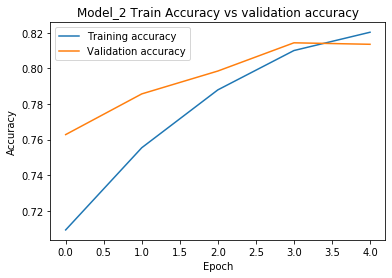

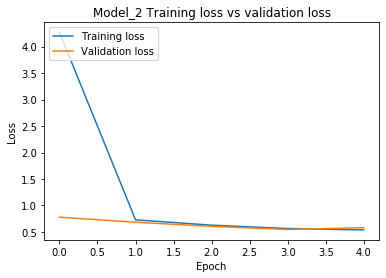


-------Evaluating Final Test Performance for Model_2-------

10000/1 - 1s - loss: 0.5932 - accuracy: 0.8071

Test Accuracy: 80.7099997997284

Test Loss: 59.92320499420166

 Model-2 Confusion Matrix
 [[837   3  14   6  16   0 116   0   8   0]
 [  3 956   5  16  10   0   8   0   2   0]
 [ 20   4 735   1 205   0  34   0   1   0]
 [ 74  17  28 657 110   0 110   0   4   0]
 [  1   1 131   5 807   0  54   0   1   0]
 [  0   0   3   0   5 845   1  75  11  60]
 [232   1 123   8 184   0 438   0  14   0]
 [  0   0   0   0   0  10   0 977   1  12]
 [  3   1  12   2  33   1  20   4 924   0]
 [  0   0   0   0   0  13   1  91   0 895]] 


 Model-2 Precision_score
 [0.71538462 0.97253306 0.69933397 0.94532374 0.58905109 0.97238205
 0.5601023  0.85178727 0.95652174 0.92554292]

 Model-2 Recall_score
 [0.837 0.956 0.735 0.657 0.807 0.845 0.438 0.977 0.924 0.895]

 Model-2 Accuracy_score
 0.8071

 Model-2 F1_score
 [0.77142857 0.96419566 0.71672355 0.77522124 0.68101266 0.90422686
 0.49158249 0.9101071

In [5]:
start=time.time()
model_2 = keras.Sequential(
[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(158, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  
])

model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#print("weights_l1",l1.get_weights())
#print("weights_l2",l2.get_weights())

history = model_2.fit(train_images, train_labels,validation_split = 0.1, epochs=5) #batch_size=4

end = time.time()
print("\n---Time to train Model_2---",time.strftime("%M:%S", time.gmtime(end-start))) 

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) #this is test
plt.title('Model_2 Train Accuracy vs validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) #plotted for test
plt.title('Model_2 Training loss vs validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper left')
plt.show()

model_2_t_acc=history.history['accuracy']
model_2_v_acc=history.history['val_accuracy']
model_2_t_loss=history.history['loss']
model_2_v_loss=history.history['val_loss']

print("\n-------Evaluating Final Test Performance for Model_2-------\n")

test_loss, test_acc = model_2.evaluate(test_images,  test_labels, verbose=2)
print('\nTest Accuracy:', test_acc*100)
print('\nTest Loss:', test_loss*100)

model_2_T_acc=test_acc
model_2_T_loss=test_loss

y_pred=model_2.predict_classes(test_images)
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()
print("\n Model-2 Confusion Matrix\n",con_mat,"\n")

precision_scoreM1=precision_score(test_labels, y_pred, average=None)
print("\n Model-2 Precision_score\n", precision_scoreM1)

recall_scoreM1=recall_score(test_labels, y_pred, average=None)
print("\n Model-2 Recall_score\n",recall_scoreM1)

accuracy_scoreM1=accuracy_score(test_labels, y_pred)
print("\n Model-2 Accuracy_score\n",accuracy_scoreM1)

f1_scoreM1=f1_score(test_labels, y_pred, average=None)
print("\n Model-2 F1_score\n",f1_scoreM1)


# Creating and simulating MODEL-2.1

In [7]:
#-----------------------------------------model_2.1 less training data--------------------------------------

start=time.time()
model_2_1 = keras.Sequential(
[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(158, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  
])

model_2_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model_2_1.fit(train_images, train_labels,validation_split = 0.4, epochs=5) #training data is 60% now
	
end = time.time()
print("\n---Time to train Model_2.1 ---",time.strftime("%M:%S", time.gmtime(end-start))) 

print("\n-----Evaluating Final Test Performance for Model_2.1----less training data-----\n")

test_loss, test_acc = model_2_1.evaluate(test_images,  test_labels, verbose=2)
print('\nTest Accuracy:', test_acc*100)
print('\nTest Loss:', test_loss*100)


Train on 36000 samples, validate on 24000 samples
Epoch 1/5
36000/36000 [==============================] - 7s 186us/sample - loss: 4.8439 - accuracy: 0.6894 - val_loss: 0.8596 - val_accuracy: 0.7473
Epoch 2/5
36000/36000 [==============================] - 6s 170us/sample - loss: 0.7133 - accuracy: 0.7425 - val_loss: 0.6659 - val_accuracy: 0.7700
Epoch 3/5
36000/36000 [==============================] - 6s 174us/sample - loss: 0.6088 - accuracy: 0.7870 - val_loss: 0.5933 - val_accuracy: 0.8031
Epoch 4/5
36000/36000 [==============================] - 6s 169us/sample - loss: 0.5576 - accuracy: 0.8040 - val_loss: 0.5538 - val_accuracy: 0.8249
Epoch 5/5
36000/36000 [==============================] - 6s 172us/sample - loss: 0.5299 - accuracy: 0.8138 - val_loss: 0.5499 - val_accuracy: 0.8149

---Time to train Model_2.1 --- 00:31

-----Evaluating Final Test Performance for Model_2.1----less training data-----

10000/1 - 1s - loss: 0.5453 - accuracy: 0.8069

Test Accuracy: 80.69000244140625

Tes

# Creating and simulating MODEL-2.3 (Keep the same order)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 137us/sample - loss: 15.9941 - accuracy: 0.6583 - val_loss: 8.4213 - val_accuracy: 0.7432
Epoch 2/5
54000/54000 [==============================] - 7s 129us/sample - loss: 6.8441 - accuracy: 0.7612 - val_loss: 6.1442 - val_accuracy: 0.7647
Epoch 3/5
54000/54000 [==============================] - 7s 129us/sample - loss: 5.2750 - accuracy: 0.7833 - val_loss: 5.3210 - val_accuracy: 0.7798
Epoch 4/5
54000/54000 [==============================] - 7s 128us/sample - loss: 4.4056 - accuracy: 0.7958 - val_loss: 4.6759 - val_accuracy: 0.7835
Epoch 5/5
54000/54000 [==============================] - 7s 129us/sample - loss: 3.8455 - accuracy: 0.8063 - val_loss: 4.1178 - val_accuracy: 0.7890

---Time to train Model_2.3 --- 00:35

-----Evaluating Final Test Performance for Model_2.3---- 0.0001 -----

10000/1 - 1s - loss: 7.3547 - accuracy: 0.7934

Test Accuracy: 79.339998960495

Test Loss: 423.

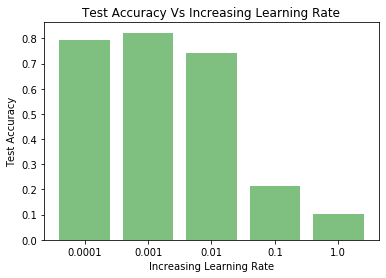

['0.0001', '0.001', '0.01', '0.1', '1.0'] [4.230140536856651, 0.593110484457016, 0.8333894920349121, 2.029496060180664, 6.3474871459960935]


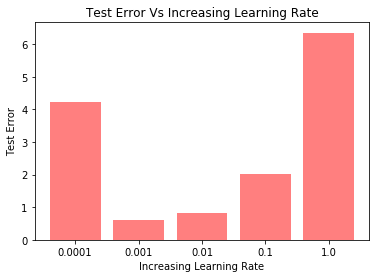

In [8]:
#-----------------------------------------model_2.3 multiple learning rates--------------------------------------

start=time.time()
t_acc=[]
t_err=[]
x_ax=["0.0001","0.001","0.01","0.1","1.0"]
l_rate=0.0001
for m in range(0,5):

	model_2_3 = keras.Sequential(
	[
	    keras.layers.Flatten(input_shape=(28, 28)),
	    keras.layers.Dense(158, activation='relu'),
	    keras.layers.Dense(10, activation='softmax')  
	])

	adam=keras.optimizers.Adamax(l_rate) #default is 0.02
	model_2_3.compile(adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
	
	history = model_2_3.fit(train_images, train_labels,validation_split = 0.1, epochs=5) #batch_size=4
	
	end = time.time()
	print("\n---Time to train Model_2.3 ---",time.strftime("%M:%S", time.gmtime(end-start))) 
	
	print("\n-----Evaluating Final Test Performance for Model_2.3----",l_rate,"-----\n")
	
	test_loss, test_acc = model_2_3.evaluate(test_images,  test_labels, verbose=2)
	print('\nTest Accuracy:', test_acc*100)
	print('\nTest Loss:', test_loss*100)
	#x_ax.append(l_rate)
	t_acc.append(test_acc)
	t_err.append(test_loss)
	l_rate=l_rate*10

print("\n---PLOT---\n")
print(x_ax,t_acc)
plt.bar(x_ax, t_acc, align='center', alpha=0.5,color='green')
plt.ylabel('Test Accuracy')
plt.xlabel('Increasing Learning Rate')
plt.title('Test Accuracy Vs Increasing Learning Rate')
plt.show()

print(x_ax,t_err)
plt.bar(x_ax, t_err, align='center', alpha=0.5,color='red')
plt.ylabel('Test Error')
plt.xlabel('Increasing Learning Rate')
plt.title('Test Error Vs Increasing Learning Rate')
plt.show()





# Creating and simulating MODEL-2.2 (Keep the same order)

In [9]:
#-----------------------------------------model_2.2 mean_squared_error--------------------------------------

start=time.time()
t_acc=[]
x_ax=["0.0001","0.001","0.01","0.1","1.0"]

model_2_2 = keras.Sequential(
[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(158, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  
])

adam=keras.optimizers.Adamax(0.02) #default is 0.02
model_2_2.compile(adam,loss=losses.mean_squared_error,metrics=['accuracy'])
	
history = model_2_2.fit(train_images, train_labels,validation_split = 0.1, epochs=5) #batch_size=4
	
end = time.time()
print("\n---Time to train Model_2.2 ---",time.strftime("%M:%S", time.gmtime(end-start))) 

print("\n-----Evaluating Final Test Performance for Model_2.2----Loss-----\n")

test_loss, test_acc = model_2_2.evaluate(test_images,  test_labels, verbose=2)
print('\nTest Accuracy:', test_acc*100)
print('\nTest Loss:', test_loss*100)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 8s 145us/sample - loss: 27.7099 - accuracy: 0.0000e+00 - val_loss: 27.6109 - val_accuracy: 0.0000e+00
Epoch 2/5
54000/54000 [==============================] - 7s 130us/sample - loss: 27.7099 - accuracy: 0.0000e+00 - val_loss: 27.6109 - val_accuracy: 0.0000e+00
Epoch 3/5
54000/54000 [==============================] - 7s 132us/sample - loss: 27.7099 - accuracy: 0.0000e+00 - val_loss: 27.6109 - val_accuracy: 0.0000e+00
Epoch 4/5
54000/54000 [==============================] - 7s 133us/sample - loss: 27.7099 - accuracy: 0.0000e+00 - val_loss: 27.6109 - val_accuracy: 0.0000e+00
Epoch 5/5
54000/54000 [==============================] - 7s 133us/sample - loss: 27.7099 - accuracy: 0.0000e+00 - val_loss: 27.6109 - val_accuracy: 0.0000e+00

---Time to train Model_2.2 --- 00:36

-----Evaluating Final Test Performance for Model_2.2----Loss-----

10000/1 - 1s - loss: 30.4500 - accuracy: 0.0000e+0

# Creating and simulating MODEL-2.4

In [11]:

#-----------------------------------------model_2.4 optimizer as SGD--------------------------------------

start=time.time()
model_2_4 = keras.Sequential(
[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(158, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  
])

model_2_4.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
	
history = model_2_4.fit(train_images, train_labels,validation_split = 0.1, epochs=5) #batch_size=4
	
end = time.time()
print("\n---Time to train Model_2.4 ---",time.strftime("%M:%S", time.gmtime(end-start))) 
	
print("\n-----Evaluating Final Test Performance for Model_2.4----SGD-----\n")
	
test_loss, test_acc = model_2_4.evaluate(test_images,  test_labels, verbose=2)
print('\nTest Accuracy:', test_acc*100)
print('\nTest Loss:', test_loss*100)



Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 133us/sample - loss: 137.0877 - accuracy: 0.1128 - val_loss: 2.2162 - val_accuracy: 0.1390
Epoch 2/5
54000/54000 [==============================] - 6s 118us/sample - loss: 2.2277 - accuracy: 0.1353 - val_loss: 2.2365 - val_accuracy: 0.1308
Epoch 3/5
54000/54000 [==============================] - 7s 129us/sample - loss: 2.2047 - accuracy: 0.1493 - val_loss: 2.2787 - val_accuracy: 0.1078
Epoch 4/5
54000/54000 [==============================] - 7s 125us/sample - loss: 2.1979 - accuracy: 0.1484 - val_loss: 2.1504 - val_accuracy: 0.1537
Epoch 5/5
54000/54000 [==============================] - 7s 121us/sample - loss: 2.1740 - accuracy: 0.1584 - val_loss: 2.2326 - val_accuracy: 0.1257

---Time to train Model_2.4 --- 00:33

-----Evaluating Final Test Performance for Model_2.4----SGD-----

10000/1 - 1s - loss: 2.1151 - accuracy: 0.1370

Test Accuracy: 13.699999451637268

Test Loss: 221.5

# Creating and simulating MODEL-2.5

In [13]:
#-----------------------------------------model_2.5 optimizer as RMSprop--------------------------------------
start=time.time()
model_2_5 = keras.Sequential(
[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(158, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  
])

model_2_5.compile(optimizer='RMSprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
	
history = model_2_5.fit(train_images, train_labels,validation_split = 0.1, epochs=5) #batch_size=4
	
end = time.time()
print("\n---Time to train Model_2.5 ---",time.strftime("%M:%S", time.gmtime(end-start))) 
	
print("\n-----Evaluating Final Test Performance for Model_2.5----RMSprop-----\n")
	
test_loss, test_acc = model_2_5.evaluate(test_images,  test_labels, verbose=2)
print('\nTest Accuracy:', test_acc*100)
print('\nTest Loss:', test_loss*100)




Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 8s 157us/sample - loss: 4.0772 - accuracy: 0.7020 - val_loss: 0.7491 - val_accuracy: 0.7338
Epoch 2/5
54000/54000 [==============================] - 8s 146us/sample - loss: 0.8294 - accuracy: 0.7785 - val_loss: 0.9507 - val_accuracy: 0.7885
Epoch 3/5
54000/54000 [==============================] - 8s 149us/sample - loss: 0.7626 - accuracy: 0.8012 - val_loss: 0.8743 - val_accuracy: 0.8025
Epoch 4/5
54000/54000 [==============================] - 9s 157us/sample - loss: 0.7497 - accuracy: 0.8124 - val_loss: 0.8305 - val_accuracy: 0.8167
Epoch 5/5
54000/54000 [==============================] - 9s 164us/sample - loss: 0.7382 - accuracy: 0.8173 - val_loss: 0.7318 - val_accuracy: 0.8242

---Time to train Model_2.5 --- 00:42

-----Evaluating Final Test Performance for Model_2.5----RMSprop-----

10000/1 - 1s - loss: 0.5030 - accuracy: 0.8163

Test Accuracy: 81.62999749183655

Test Loss: 78.6

# Creating and simulating MODEL-3

Train on 54000 samples, validate on 6000 samples
Epoch 1/40
54000/54000 [==============================] - 8s 145us/sample - loss: 0.4847 - accuracy: 0.8261 - val_loss: 0.3906 - val_accuracy: 0.8603
Epoch 2/40
54000/54000 [==============================] - 7s 135us/sample - loss: 0.3753 - accuracy: 0.8639 - val_loss: 0.3633 - val_accuracy: 0.8680
Epoch 3/40
54000/54000 [==============================] - 7s 136us/sample - loss: 0.3409 - accuracy: 0.8745 - val_loss: 0.3373 - val_accuracy: 0.8782
Epoch 4/40
54000/54000 [==============================] - 7s 135us/sample - loss: 0.3153 - accuracy: 0.8831 - val_loss: 0.3288 - val_accuracy: 0.8777
Epoch 5/40
54000/54000 [==============================] - 7s 136us/sample - loss: 0.2995 - accuracy: 0.8894 - val_loss: 0.3297 - val_accuracy: 0.8785
Epoch 6/40
54000/54000 [==============================] - 7s 136us/sample - loss: 0.2819 - accuracy: 0.8959 - val_loss: 0.3217 - val_accuracy: 0.8808
Epoch 7/40
54000/54000 [===========================

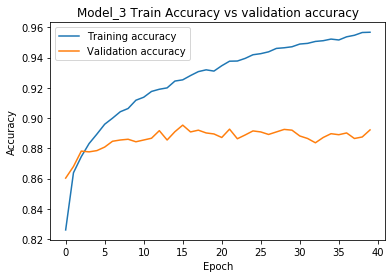

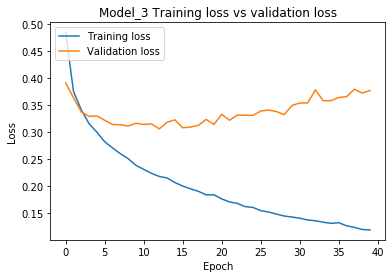


-------Evaluating Final Test Performance for Model_3-------

10000/1 - 1s - loss: 0.2148 - accuracy: 0.8834

Test Accuracy: 88.3400022983551

Test Loss: 39.11313819527626


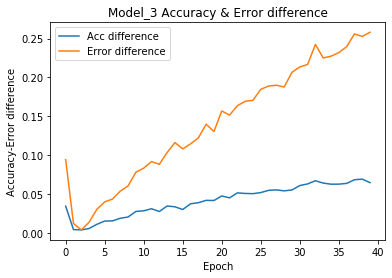


 Model-3 Confusion Matrix
 [[842   1  15  18   3   1 109   0  11   0]
 [  3 976   0  17   1   0   3   0   0   0]
 [ 23   2 777  15 113   1  65   0   4   0]
 [ 19  14   3 906  21   1  28   0   8   0]
 [  3   1  87  46 803   0  54   0   6   0]
 [  0   0   0   1   0 934   0  41   2  22]
 [127   1  63  31  79   0 690   0   9   0]
 [  0   0   0   0   0   6   0 972   0  22]
 [  7   0   1   5   3   2   3   5 974   0]
 [  0   0   0   0   0  10   1  29   0 960]] 


 Model-3 Precision_score
 [0.82226562 0.98090452 0.82135307 0.8719923  0.78494624 0.97801047
 0.72402938 0.92836676 0.96055227 0.9561753 ]

 Model-3 Recall_score
 [0.842 0.976 0.777 0.906 0.803 0.934 0.69  0.972 0.974 0.96 ]

 Model-3 Accuracy_score
 0.8834

 Model-3 F1_score
 [0.83201581 0.97844612 0.79856115 0.88867092 0.79387049 0.95549872
 0.70660522 0.94968246 0.96722939 0.95808383]


In [9]:
start=time.time()
model_3 = keras.Sequential(
[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(158, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')  #number of neuraons in this layer have to be equal to total labels
])

model_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


#print("weights_l1",l1.get_weights())
#print("weights_l2",l2.get_weights())

history = model_3.fit(train_images, train_labels,validation_split = 0.1, epochs=40) #batch_size=4

end = time.time()
print("\n---Time to train Model_3---",time.strftime("%M:%S", time.gmtime(end-start))) 

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) #this is test
plt.title('Model_3 Train Accuracy vs validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) #plotted for test
plt.title('Model_3 Training loss vs validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper left')
plt.show()

model_3_t_acc=history.history['accuracy']
model_3_v_acc=history.history['val_accuracy']
model_3_t_loss=history.history['loss']
model_3_v_loss=history.history['val_loss']

print("\n-------Evaluating Final Test Performance for Model_3-------\n")

test_loss, test_acc = model_3.evaluate(test_images,  test_labels, verbose=2)
print('\nTest Accuracy:', test_acc*100)
print('\nTest Loss:', test_loss*100)

model_3_T_acc=test_acc
model_3_T_loss=test_loss

model_3_Ac_difference=[]
model_3_Er_difference=[]
for var in range(0,len(model_3_t_acc) ):
	a=model_3_t_acc[var] - model_3_v_acc[var]
	b=model_3_t_loss[var] - model_3_v_loss[var]
	if(a<0):a=a*(-1)
	if(b<0):b=b*(-1)	
	model_3_Ac_difference.append(a)
	model_3_Er_difference.append(b)

plt.plot(model_3_Ac_difference)
plt.plot(model_3_Er_difference)
plt.title('Model_3 Accuracy & Error difference')
plt.ylabel('Accuracy-Error difference')
plt.xlabel('Epoch')
plt.legend(['Acc difference', 'Error difference'], loc='upper left')
plt.show()


y_pred=model_3.predict_classes(test_images)
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()
print("\n Model-3 Confusion Matrix\n",con_mat,"\n")

precision_scoreM1=precision_score(test_labels, y_pred, average=None)
print("\n Model-3 Precision_score\n", precision_scoreM1)

recall_scoreM1=recall_score(test_labels, y_pred, average=None)
print("\n Model-3 Recall_score\n",recall_scoreM1)

accuracy_scoreM1=accuracy_score(test_labels, y_pred)
print("\n Model-3 Accuracy_score\n",accuracy_scoreM1)

f1_scoreM1=f1_score(test_labels, y_pred, average=None)
print("\n Model-3 F1_score\n",f1_scoreM1)



# Creating and simulating MODEL-3.1

Train on 54000 samples, validate on 6000 samples
Epoch 1/40
54000/54000 [==============================] - 8s 152us/sample - loss: 0.5031 - accuracy: 0.8246 - val_loss: 0.3889 - val_accuracy: 0.8627
Epoch 2/40
54000/54000 [==============================] - 8s 141us/sample - loss: 0.3767 - accuracy: 0.8653 - val_loss: 0.3741 - val_accuracy: 0.8638
Epoch 3/40
54000/54000 [==============================] - 7s 136us/sample - loss: 0.3364 - accuracy: 0.8772 - val_loss: 0.3441 - val_accuracy: 0.8757
Epoch 4/40
54000/54000 [==============================] - 7s 133us/sample - loss: 0.3158 - accuracy: 0.8839 - val_loss: 0.3630 - val_accuracy: 0.8718
Epoch 5/40
54000/54000 [==============================] - 7s 134us/sample - loss: 0.2941 - accuracy: 0.8915 - val_loss: 0.3411 - val_accuracy: 0.8740
Epoch 6/40
54000/54000 [==============================] - 7s 134us/sample - loss: 0.2801 - accuracy: 0.8969 - val_loss: 0.3419 - val_accuracy: 0.8783
Epoch 7/40
54000/54000 [===========================

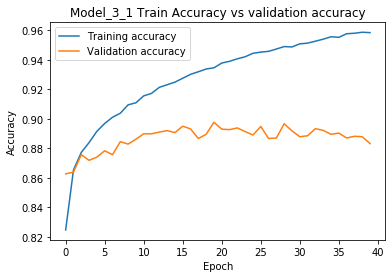

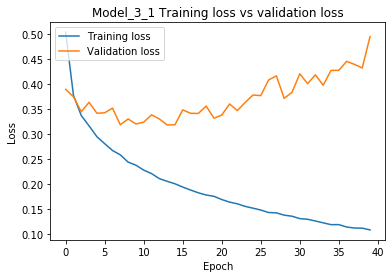


-------Evaluating Final Test Performance for Model_3_1-------

10000/1 - 1s - loss: 0.2946 - accuracy: 0.8773

Test Accuracy: 87.73000240325928

Test Loss: 52.17199064925313

 Model-3.1 Confusion Matrix
 [[831   3  13  14   8   1 121   1   8   0]
 [  2 984   0   6   7   0   1   0   0   0]
 [ 18   1 731   7 181   0  62   0   0   0]
 [ 24  15  22 819  76   0  38   0   6   0]
 [  3   0  48  10 915   0  23   0   1   0]
 [  0   0   0   1   0 961   0  17   1  20]
 [102   1  82  13 156   0 640   0   6   0]
 [  0   0   0   0   0  14   0 965   1  20]
 [  7   0   6   0   7   1   7   5 967   0]
 [  0   0   0   0   0   4   1  35   0 960]] 


 Model-3.1 Precision_score
 [0.84194529 0.98007968 0.81042129 0.94137931 0.67777778 0.97961264
 0.71668533 0.94330401 0.97676768 0.96      ]

 Model-3.1 Recall_score
 [0.831 0.984 0.731 0.819 0.915 0.961 0.64  0.965 0.967 0.96 ]

 Model-3.1 Accuracy_score
 0.8773

 Model-3.1 F1_score
 [0.83643684 0.98203593 0.76866456 0.87593583 0.7787234  0.97021706
 0.67617

In [10]:

#-----------------------------------------model_3.1 below relu activation function--------------------------------------

start=time.time()
model_3_1 = keras.Sequential(
[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(158, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  #number of neuraons in this layer have to be equal to total labels
])

model_3_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


#print("weights_l1",l1.get_weights())
#print("weights_l2",l2.get_weights())

history = model_3_1.fit(train_images, train_labels,validation_split = 0.1, epochs=40) #batch_size=4

end = time.time()
print("\n---Time to train Model_3.1---",time.strftime("%M:%S", time.gmtime(end-start))) 

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) #this is test
plt.title('Model_3_1 Train Accuracy vs validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) #plotted for test
plt.title('Model_3_1 Training loss vs validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper left')
plt.show()

model_3_t_acc=history.history['accuracy']
model_3_v_acc=history.history['val_accuracy']
model_3_t_loss=history.history['loss']
model_3_v_loss=history.history['val_loss']

print("\n-------Evaluating Final Test Performance for Model_3_1-------\n")

test_loss, test_acc = model_3_1.evaluate(test_images,  test_labels, verbose=2)
print('\nTest Accuracy:', test_acc*100)
print('\nTest Loss:', test_loss*100)

model_3_1_T_acc=test_acc
model_3_1_T_loss=test_loss


y_pred=model_3_1.predict_classes(test_images)
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()
print("\n Model-3.1 Confusion Matrix\n",con_mat,"\n")

precision_scoreM1=precision_score(test_labels, y_pred, average=None)
print("\n Model-3.1 Precision_score\n", precision_scoreM1)

recall_scoreM1=recall_score(test_labels, y_pred, average=None)
print("\n Model-3.1 Recall_score\n",recall_scoreM1)

accuracy_scoreM1=accuracy_score(test_labels, y_pred)
print("\n Model-3.1 Accuracy_score\n",accuracy_scoreM1)

f1_scoreM1=f1_score(test_labels, y_pred, average=None)
print("\n Model-3.1 F1_score\n",f1_scoreM1)



# Creating and simulating MODEL-4

Train on 54000 samples, validate on 6000 samples
Epoch 1/40
54000/54000 [==============================] - 11s 206us/sample - loss: 0.4882 - accuracy: 0.8254 - val_loss: 0.3895 - val_accuracy: 0.8595
Epoch 2/40
54000/54000 [==============================] - 9s 167us/sample - loss: 0.3680 - accuracy: 0.8649 - val_loss: 0.3900 - val_accuracy: 0.8552
Epoch 3/40
54000/54000 [==============================] - 9s 167us/sample - loss: 0.3306 - accuracy: 0.8790 - val_loss: 0.3323 - val_accuracy: 0.8773
Epoch 4/40
54000/54000 [==============================] - 9s 167us/sample - loss: 0.3118 - accuracy: 0.8837 - val_loss: 0.3492 - val_accuracy: 0.8755
Epoch 5/40
54000/54000 [==============================] - 9s 169us/sample - loss: 0.2925 - accuracy: 0.8903 - val_loss: 0.3308 - val_accuracy: 0.8780
Epoch 6/40
54000/54000 [==============================] - 9s 168us/sample - loss: 0.2794 - accuracy: 0.8953 - val_loss: 0.3411 - val_accuracy: 0.8798
Epoch 7/40
54000/54000 [==========================

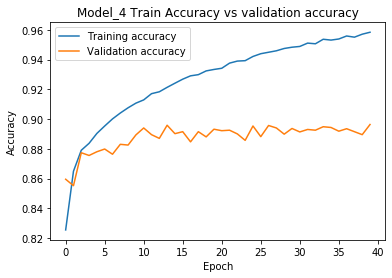

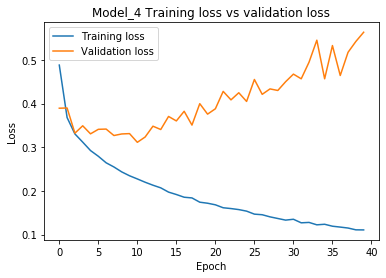


-------Evaluating Final Test Performance for Model_4-------

10000/1 - 1s - loss: 0.2913 - accuracy: 0.8923

Test Accuracy: 89.2300009727478

Test Loss: 57.76623069688678


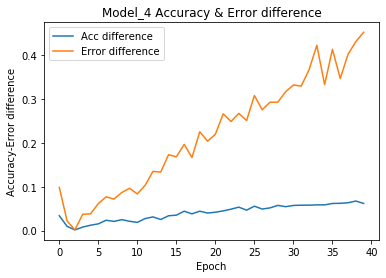


 Model-4 Confusion Matrix
 [[853   1  13  25   4   1  94   0   9   0]
 [  1 970   0  20   6   0   1   0   2   0]
 [ 15   0 819  12 109   0  41   0   4   0]
 [ 17   4  12 898  47   0  13   0   9   0]
 [  0   1  75  27 857   0  36   0   4   0]
 [  0   0   0   1   0 953   0  20   4  22]
 [112   0  82  31 100   0 664   0  11   0]
 [  0   0   0   0   0   7   0 968   1  24]
 [  5   0   1   6   4   1   4   2 977   0]
 [  1   0   0   0   0   6   0  29   0 964]] 


 Model-4 Precision_score
 [0.84960159 0.99385246 0.81736527 0.88039216 0.76042591 0.98450413
 0.77842907 0.94995093 0.956905   0.95445545]

 Model-4 Recall_score
 [0.853 0.97  0.819 0.898 0.857 0.953 0.664 0.968 0.977 0.964]

 Model-4 Accuracy_score
 0.8923

 Model-4 F1_score
 [0.85129741 0.98178138 0.81818182 0.88910891 0.80582981 0.96849593
 0.71667566 0.95889054 0.9668481  0.95920398]


In [11]:
#------------------------------------------model_4 below more layers-----------------------------------------------
start=time.time()
model_4 = keras.Sequential(
[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  
])

model_4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#print("weights_l1",l1.get_weights())
#print("weights_l2",l2.get_weights())

history = model_4.fit(train_images, train_labels,validation_split = 0.1, epochs=40) #batch_size=4

end = time.time()
print("\n---Time to train Model_4---",time.strftime("%M:%S", time.gmtime(end-start))) 

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) #this is test
plt.title('Model_4 Train Accuracy vs validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) #plotted for test
plt.title('Model_4 Training loss vs validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper left')
plt.show()

model_4_t_acc=history.history['accuracy']
model_4_v_acc=history.history['val_accuracy']
model_4_t_loss=history.history['loss']
model_4_v_loss=history.history['val_loss']

print("\n-------Evaluating Final Test Performance for Model_4-------\n")

test_loss, test_acc = model_4.evaluate(test_images,  test_labels, verbose=2)
print('\nTest Accuracy:', test_acc*100)
print('\nTest Loss:', test_loss*100)

model_4_T_acc=test_acc
model_4_T_loss=test_loss

model_4_Ac_difference=[]
model_4_Er_difference=[]
for var in range(0,len(model_3_t_acc) ):
	a=model_4_t_acc[var] - model_4_v_acc[var]
	b=model_4_t_loss[var] - model_4_v_loss[var]
	if(a<0):a=a*(-1)
	if(b<0):b=b*(-1)	
	model_4_Ac_difference.append(a)
	model_4_Er_difference.append(b)

plt.plot(model_4_Ac_difference)
plt.plot(model_4_Er_difference)
plt.title('Model_4 Accuracy & Error difference')
plt.ylabel('Accuracy-Error difference')
plt.xlabel('Epoch')
plt.legend(['Acc difference', 'Error difference'], loc='upper left')
plt.show()

y_pred=model_4.predict_classes(test_images)
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()
print("\n Model-4 Confusion Matrix\n",con_mat,"\n")

precision_scoreM1=precision_score(test_labels, y_pred, average=None)
print("\n Model-4 Precision_score\n", precision_scoreM1)

recall_scoreM1=recall_score(test_labels, y_pred, average=None)
print("\n Model-4 Recall_score\n",recall_scoreM1)

accuracy_scoreM1=accuracy_score(test_labels, y_pred)
print("\n Model-4 Accuracy_score\n",accuracy_scoreM1)

f1_scoreM1=f1_score(test_labels, y_pred, average=None)
print("\n Model-4 F1_score\n",f1_scoreM1)


# Creating and simulating MODEL-5

Train on 54000 samples, validate on 6000 samples
Epoch 1/40
54000/54000 [==============================] - 7s 121us/sample - loss: 0.6291 - accuracy: 0.7954 - val_loss: 0.4433 - val_accuracy: 0.8402
Epoch 2/40
54000/54000 [==============================] - 6s 110us/sample - loss: 0.4173 - accuracy: 0.8511 - val_loss: 0.3887 - val_accuracy: 0.8593
Epoch 3/40
54000/54000 [==============================] - 6s 111us/sample - loss: 0.3772 - accuracy: 0.8651 - val_loss: 0.3804 - val_accuracy: 0.8588
Epoch 4/40
54000/54000 [==============================] - 6s 113us/sample - loss: 0.3532 - accuracy: 0.8719 - val_loss: 0.3537 - val_accuracy: 0.8688
Epoch 5/40
54000/54000 [==============================] - 6s 111us/sample - loss: 0.3353 - accuracy: 0.8785 - val_loss: 0.3422 - val_accuracy: 0.8725
Epoch 6/40
54000/54000 [==============================] - 6s 112us/sample - loss: 0.3228 - accuracy: 0.8836 - val_loss: 0.3388 - val_accuracy: 0.8760
Epoch 7/40
54000/54000 [===========================

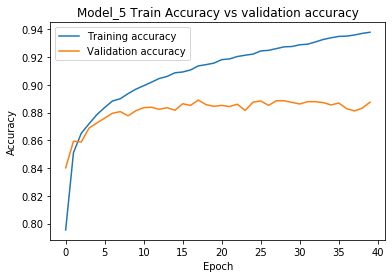

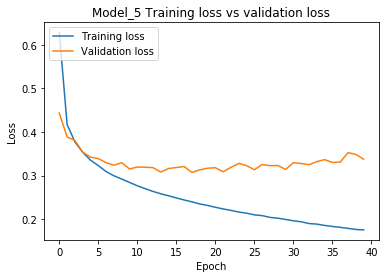


-------Evaluating Final Test Performance for Model_5-------

10000/1 - 1s - loss: 0.3157 - accuracy: 0.8798

Test Accuracy: 87.9800021648407

Test Loss: 37.053852858543394

 Model-5 Confusion Matrix
 [[844   1  16  21   4   1 106   1   6   0]
 [  5 964   5  19   3   0   3   0   1   0]
 [ 18   0 835  11  75   1  59   0   1   0]
 [ 29   7  19 873  30   0  37   0   5   0]
 [  1   1 115  28 792   1  58   0   4   0]
 [  1   0   0   1   0 960   0  20   4  14]
 [124   1 114  22  61   0 666   1  11   0]
 [  0   0   0   0   0  27   0 945   0  28]
 [  6   0   6   3   3   3   9   4 965   1]
 [  1   0   0   0   0   9   1  35   0 954]] 


 Model-5 Precision_score
 [0.8202138  0.98973306 0.75225225 0.89263804 0.81818182 0.95808383
 0.70926518 0.93936382 0.96790371 0.95687061]

 Model-5 Recall_score
 [0.844 0.964 0.835 0.873 0.792 0.96  0.666 0.945 0.965 0.954]

 Model-5 Accuracy_score
 0.8798

 Model-5 F1_score
 [0.83193691 0.97669706 0.79146919 0.88270981 0.80487805 0.95904096
 0.68695204 0.942173

In [13]:

#-----------------------------model_5 below sigmoid activation function----------------------------
start=time.time()
model_5 = keras.Sequential(
[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')  #number of neuraons in this layer have to be equal to total labels
])

model_5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#print("weights_l1",l1.get_weights())
#print("weights_l2",l2.get_weights())

history = model_5.fit(train_images, train_labels,validation_split = 0.1, epochs=40) #batch_size=4

end = time.time()
print("\n---Time to train Model_5---",time.strftime("%M:%S", time.gmtime(end-start))) 

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) #this is test
plt.title('Model_5 Train Accuracy vs validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) #plotted for test
plt.title('Model_5 Training loss vs validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper left')
plt.show()

model_5_t_acc=history.history['accuracy']
model_5_v_acc=history.history['val_accuracy']
model_5_t_loss=history.history['loss']
model_5_v_loss=history.history['val_loss']


print("\n-------Evaluating Final Test Performance for Model_5-------\n")

test_loss, test_acc = model_5.evaluate(test_images,  test_labels, verbose=2)
print('\nTest Accuracy:', test_acc*100)
print('\nTest Loss:', test_loss*100)

model_5_T_acc=test_acc
model_5_T_loss=test_loss

y_pred=model_5.predict_classes(test_images)
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()
print("\n Model-5 Confusion Matrix\n",con_mat,"\n")

precision_scoreM1=precision_score(test_labels, y_pred, average=None)
print("\n Model-5 Precision_score\n", precision_scoreM1)

recall_scoreM1=recall_score(test_labels, y_pred, average=None)
print("\n Model-5 Recall_score\n",recall_scoreM1)

accuracy_scoreM1=accuracy_score(test_labels, y_pred)
print("\n Model-5 Accuracy_score\n",accuracy_scoreM1)

f1_scoreM1=f1_score(test_labels, y_pred, average=None)
print("\n Model-5 F1_score\n",f1_scoreM1)



# How to select best model via various plots.

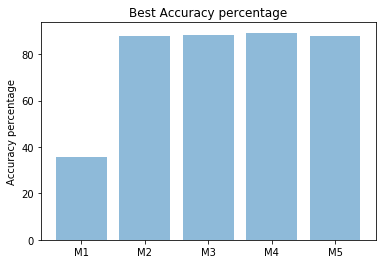

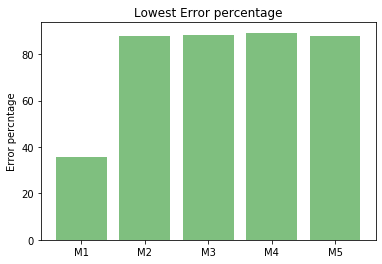

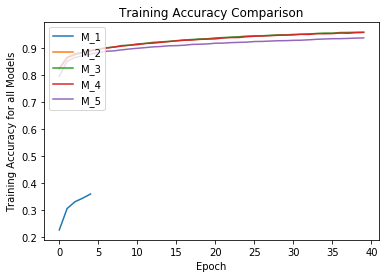

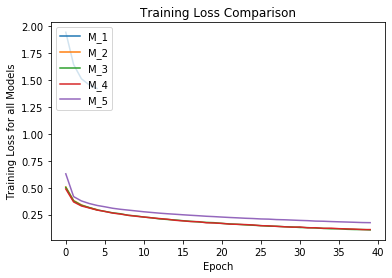

In [14]:
test_acc=[]
test_err=[]
x_ax=[]

x_ax=["M1","M2","M3","M4","M5"]

test_acc=[model_1_T_acc*100, model_2_T_acc*100, model_3_T_acc*100, model_4_T_acc*100, model_5_T_acc*100] 
test_err=[model_1_T_loss, model_2_T_loss, model_3_T_loss, model_4_T_loss, model_5_T_loss]

plt.bar(x_ax, test_acc, align='center', alpha=0.5)
plt.ylabel('Accuracy percentage')
plt.title('Best Accuracy percentage')

plt.show()

plt.bar(x_ax, test_acc, align='center', color='green',alpha=0.5)
plt.ylabel('Error percntage')
plt.title('Lowest Error percentage')

plt.show()

plt.plot(model_1_t_acc)
plt.plot(model_2_t_acc)
plt.plot(model_3_t_acc)
plt.plot(model_4_t_acc)
plt.plot(model_5_t_acc)
plt.title('Training Accuracy Comparison')
plt.ylabel('Training Accuracy for all Models')
plt.xlabel('Epoch')
plt.legend(['M_1', 'M_2','M_3', 'M_4','M_5'], loc='upper left')
plt.show()

plt.plot(model_1_t_loss)
plt.plot(model_2_t_loss)
plt.plot(model_3_t_loss)
plt.plot(model_4_t_loss)
plt.plot(model_5_t_loss)
plt.title('Training Loss Comparison')
plt.ylabel('Training Loss for all Models')
plt.xlabel('Epoch')
plt.legend(['M_1', 'M_2','M_3', 'M_4','M_5'], loc='upper left')
plt.show()

#https://www.openml.org/d/40996------------------------------------------------------------------------


In [ ]:
#https://medium.com/@ipylypenko/exploring-neural-networks-with-fashion-mnist-b0a8214b7b7b